# logreg realization

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import LogisticRegression
import numbers
from scipy.spatial.distance import minkowski
from collections import Counter

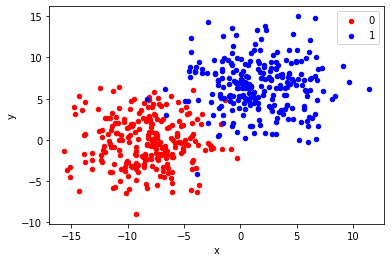

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=2, n_features=2,shuffle=True,cluster_std=3)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [4]:
%%time
clf = LogisticRegression(random_state=0)
clf.fit(X, y)
clf.score(X,y)

CPU times: user 5.66 ms, sys: 1.05 ms, total: 6.7 ms
Wall time: 5.83 ms


0.976

In [6]:
class logreg():
    def __init__(self, lr = 0.001, random_state=None, zero_init=False):
        self.lr = lr
        self.random_state = random_state
        self.zero_init = zero_init
        if random_state is not None:
            np.random.seed(random_state)
        
        
    def fit(self, X, y, debug = True):
        acc_loss = []
        if not isinstance(self.lr, numbers.Number) or self.lr < 0:
            raise ValueError("Learning rate must be positive; got (lr=%r)"
                             % self.lr)
            
        
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        if n_classes != 2:
            raise ValueError("This solver needs samples of 2 classes"
                             " in the data, you got "
                             "  %r classes" % n_classes)
            
        # initialization
        self.X = X
        self.w = self._initialize(self.X.shape[1])
        self.b = 1
        self.y = y
        epsilon = 1e-8
    
        # main loop
        for j in range(100):
            for i in range(n_samples):
                if debug:
                    print('w: ', self.w)
                    print('X: ', self.X[i])
                    print('Y: ', self.y[i])

                Y_ = self.y[i]
                X_ = self.X[i]


                res = np.dot(self.w, X_) + self.b
                A = self._sigmoid(res) # activation

                loss = -1*(Y_*np.log(A + epsilon)+(1 - Y_)*np.log(1 - A + epsilon)) 
                acc_loss.append(loss)
                if debug: 
                    print('res: ', res)
                    print('A: ', A)
                    print('loss: ', loss)


                dw =((A-Y_)*X_)
                db = (A-Y_)
                if debug:
                    print('dw: ', dw)
                    print(self.w)
                self.w  -= self.lr*dw
                self.b -= self.lr*db

        #print(self.w)
        return acc_loss
    
    def predict(self, X):
        self.X_pr = np.append(X, np.ones((X.shape[0],1)), axis=1)
        res =np.dot(self.X_pr, self.w)
        res = res.flatten()
        return res.astype(int)
    
    
    @staticmethod
    def _sigmoid(z):
        return 1/(1+np.exp(-z))
        
    
    
    def _initialize(self, dim):
        w = np.zeros(dim)
        if not self.zero_init:
            w = np.random.random(dim)*2
        return w

        
        

In [7]:
%%time
A = logreg(random_state=35)
loss = A.fit(X, y, debug=False)

CPU times: user 893 ms, sys: 33.9 ms, total: 927 ms
Wall time: 904 ms


# Собственная реализация

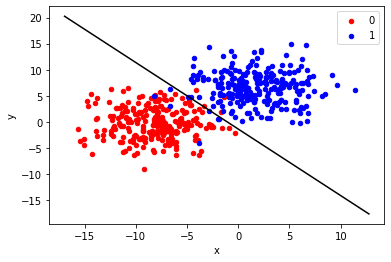

In [8]:
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
xmin, xmax = pyplot.xlim()
w = A.w
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (A.b) / w[1] 
pyplot.plot(xx, yy, 'k-')
pyplot.show()

# реализация sklearn

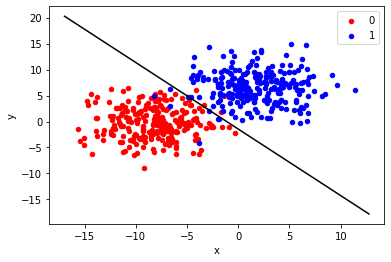

In [9]:
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
xmin, xmax = pyplot.xlim()
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xmin, xmax)
yy = a * xx - (clf.intercept_) / w[1] 
pyplot.plot(xx, yy, 'k-')
pyplot.show()

# переходим к knn

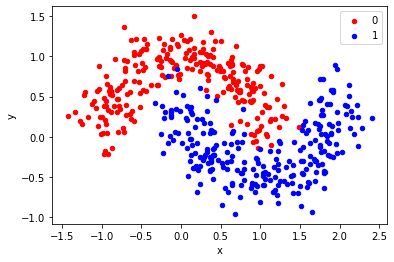

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


In [13]:
%%time
clf = KNeighborsClassifier()
clf.fit(X, y)
lt = clf.predict(X)
#clf.score(X, y)

CPU times: user 17.8 ms, sys: 2.43 ms, total: 20.2 ms
Wall time: 17.9 ms


In [14]:
class knn():
    def __init__(self, n_neighbors=5, leaf_size=30, p=2):
        self.n_neighbors = n_neighbors
        self.leaf_size = leaf_size
        self.p = p
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_to):
        allres = []
        for x in X_to:
            x_list = []
            for t in zip(self.X, self.y):
                distance = minkowski(x,t[0], self.p)
                x_list.append((distance, t[1]))
            x_list.sort(key = lambda x: x[0])  
            res = x_list[:self.n_neighbors]
            res = Counter([x[1] for x in res]).most_common()[0][0]            
            allres.append(res)
        return allres
            
            
    

In [15]:
%%time
model = knn()
model.fit(X,y)
l = model.predict(X)

CPU times: user 2.26 s, sys: 11.3 ms, total: 2.27 s
Wall time: 2.28 s


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(l, y) # моя типо точность

0.978

In [18]:
accuracy_score(lt, y) # sklearn типо точность, все ровно, только медленнее

0.978

# Дерево решений

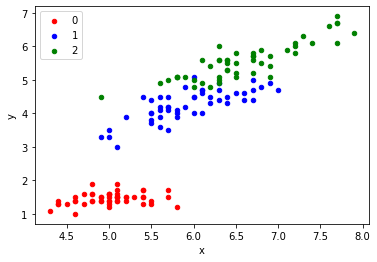

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
# scatter plot, dots colored by class value
df = DataFrame(dict(x=iris.data[:,0], y=iris.data[:,2], label=iris.target))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()



In [22]:
%%time
clf = DecisionTreeClassifier(random_state=0)
clf.fit(iris.data, iris.target)
accuracy_score(clf.predict(iris.data), iris.target)

CPU times: user 1.52 ms, sys: 621 µs, total: 2.14 ms
Wall time: 1.5 ms


1.0

In [21]:
class des_tree():
    def __init__(self, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        
    def fit(self,X, y):
        n_samples, self.n_features_ = X.shape
        self.min_samples_split = max(self.min_samples_split, 2 * self.min_samples_leaf)
        X = np.hstack([X, np.array([[k] for k in y])])
        # build tree
        self.root = self.get_split(X)
        self.split(self.root, 1)

    def get_split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    
    def gini_index(self, groups, classes):
        n_instances = float(sum([len(group) for group in groups]))
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            gini += (1.0 - score) * (size / n_instances)
        return gini

    
    def test_split(self, index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right
    
    
    # Create a terminal node value
    def to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    # Create child splits for a node or make terminal
    def split(self, node, depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            return
        # check for max depth
        if depth >= self.max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        # process left child
        if len(left) <= self.min_samples_leaf:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], depth+1)
        # process right child
        if len(right) <= self.min_samples_leaf:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], depth+1)


    # Print a decision tree
    def print_tree(node, depth=0):
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            print_tree(node['left'], depth+1)
            print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))
            
    
    def predict(self,X):
        allres = []
        for row in X:
            res = self.mpredict(row)
            allres.append(res)
        return np.array(allres)
            
    def mpredict(self, row, node=None):
        if node is None:
            node = self.root
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.mpredict(row, node['left'])
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.mpredict(row, node['right'])
            else:
                return node['right']


In [25]:
%%time
clf = des_tree()
clf.fit(iris.data, iris.target)
accuracy_score(clf.predict(iris.data), iris.target)

CPU times: user 164 ms, sys: 3.48 ms, total: 167 ms
Wall time: 166 ms


1.0

# RandomForest

## Идея простая - разные строки, разные столбцы, в конце - голосование

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=10,n_informative=3, n_redundant=0, random_state=0, shuffle=True)
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=0)

In [28]:
yt = clf.predict(X)
accuracy_score(yt, y) # s

0.7714

In [29]:
# работает очен долго, надо параллелить
class random_forest():
    def __init__(self, n_estimators=10, max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self,X,y):
        self.models_list = []
        for i in range(self.n_estimators):
            tree = des_tree()
            bag, cols = self.get_bootstrap_sample(X,y)
            tree.fit(bag[:,:-1], bag[:,-1])
            self.models_list.append((tree, cols))
            #print('got ', i)
            
        print(self.models_list)
        
    def predict(self,X):
        reslist = None
        for tree, cols in self.models_list:
            res = tree.predict(X[:,cols[:-1]])
            if reslist is None:
                reslist = res
            else:
                reslist += res
        
        return np.round(reslist/self.n_estimators).astype(np.int)
            
            
            
        
        
    def get_bootstrap_sample(self, data, target):
        X = np.hstack([data, np.array([[k] for k in target])])
        indices = np.random.randint(0, len(X), data.shape[0])
        columns = np.unique(np.random.randint(0, X.shape[1]-1, ((X.shape[1]-1)//4, (X.shape[1]-1)//2)))
        columns = np.unique(np.append(columns, X.shape[1]-1))
        samples = X[indices][:,columns]
        return samples, columns
    

In [30]:
forest = random_forest()
forest.fit(X,y)

KeyboardInterrupt: 

In [ ]:
ft = forest.predict(X)

In [ ]:
accuracy_score(ft, y)